## Libraries

In [ ]:
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=98f622e0b7bc832cea0ef0543d08337603c50dba9095551a5db9470a4e25e49d
  Stored in directory: /root/.cache/pip/wheels/07/93/05/72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia


In [ ]:
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

## Creating the graph

#### Initial link

In [ ]:
SEED = "2022 FIFA World Cup".title()
STOPS = ("FIFA",
         "FIFA 2022",
         "FIFA World Cup",
         "2022 tournament")

#### Organizing the search

In [ ]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

#### Creating the initial graph

In [ ]:
g = nx.DiGraph()
layer, page = todo_lst[0]

#### Complete graph (without preprocessing)

In [ ]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst, 
  # and add it to the set of processed pages. 
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)
  
  # Show progress
  print(layer, page) 
  
  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue
  
  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]

0 2022 Fifa World Cup
1 10,000 Yen Coin
1 1928 Summer Olympics
1 1930 Fifa World Cup
Could not load 1930 Fifa World Cup
1 1930 Fifa World Cup Final
1 1930 Fifa World Cup Squads
Could not load 1930 Fifa World Cup Squads
1 1934 Fifa World Cup
Could not load 1934 Fifa World Cup
1 1934 Fifa World Cup Final
Could not load 1934 Fifa World Cup Final
1 1934 Fifa World Cup Qualification
Could not load 1934 Fifa World Cup Qualification
1 1934 Fifa World Cup Squads
Could not load 1934 Fifa World Cup Squads
1 1938 Fifa World Cup
Could not load 1938 Fifa World Cup
1 1938 Fifa World Cup Final
Could not load 1938 Fifa World Cup Final
1 1938 Fifa World Cup Qualification
Could not load 1938 Fifa World Cup Qualification
1 1938 Fifa World Cup Squads
Could not load 1938 Fifa World Cup Squads
1 1950 Fifa World Cup
Could not load 1950 Fifa World Cup
1 1950 Fifa World Cup Qualification
1 1950 Fifa World Cup Squads
Could not load 1950 Fifa World Cup Squads
1 1954 Fifa World Cup
Could not load 1954 Fifa World 

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Cafu
1 Cameroon National Football Team
Could not load Cameroon National Football Team
1 Canadian Soccer Association
1 Carles Puyol
1 Carlos Alberto Batres
1 Carlos Batres
1 Carlos Eugênio Simon
1 Carlos Humberto Paredes
1 Carsten Jancker
1 Carsten Ramelow
1 Chile National Football Team
1 China National Football Team
1 Chinese Football Association
1 Choi Jin-Cheul
1 Christian Vieri
1 Claudio Caniggia
1 Claudio Reyna
1 Clint Mathis
1 Coffi Codjia
1 Colombia National Football Team
1 Colombian Football Federation
1 Computer-Generated Imagery
Could not load Computer-Generated Imagery
1 Confederation Of African Football
1 Costa Rica National Football Team
1 Costa Rican Football Federation
1 Croatia National Football Team
1 Cuauhtémoc Blanco
1 Daegu
Could not load Daegu
1 Daegu Stadium
1 Daegu World Cup Stadium
1 Daejeon
1 Daejeon World Cup Stadium
1 Damien Duff
1 Danish Football Association
1 Danish Football Union
1 Darío Rodríguez (Uruguayan Footballer)
1 David Beckham
1 Davi

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

79839 nodes, 214626 edges


## Pre-processing

#### Eliminating duplicates

In [ ]:
original = g.copy()

In [ ]:
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s") 
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in 
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Mark Shield', 'Mark Shields'), ('2019 Uefa Nations League Final', '2019 Uefa Nations League Finals'), ('Uefa European Championship', 'Uefa European Championships'), ('2021 Uefa Nations League Final', '2021 Uefa Nations League Finals'), ('Clean Sheet', 'Clean Sheets'), ('Hat-Trick', 'Hat-Tricks'), ("Fifa Men'S World Ranking", "Fifa Men'S World Rankings"), ('Fifa World Cup Mascot', 'Fifa World Cup Mascots'), ('Fifa World Ranking', 'Fifa World Rankings'), ('Video Assistant Referee', 'Video Assistant Referees'), ('Summer Olympic', 'Summer Olympics'), ('Winter Olympic', 'Winter Olympics'), ('Doping In Sport', 'Doping In Sports'), ('Football Chant', 'Football Chants'), ('Sport', 'Sports'), ("Supporters' Group", "Supporters' Groups"), ('Cyprus International Football Tournament', 'Cyprus International Football Tournaments'), ('Boeing Nb', 'Boeing Nbs'), ('Wingtip Device', 'Wingtip Devices'), ('Tantra', 'Tantras'), ('Asian Brazilian', 'Asian Brazilians'), ('Emerging Power', 'Emerging Powers'

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

79634 nodes, 214415 edges


## Truncate the network

#### Checking the degree for each node

This can be done because, many times, most of the nodes have only one connection. So, it's possible to remove these nodes with only one incident edge to make the network more compact and less hairy without hurting the final results

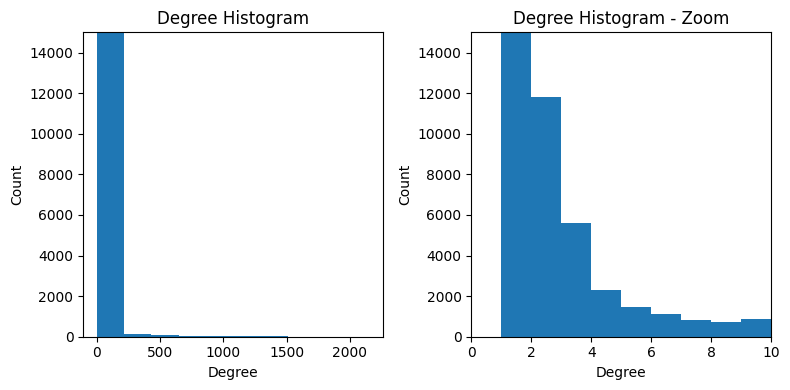

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,15000)

plt.tight_layout()
plt.show()

#### Removing nodes with degree = 1 (only one neighbor)

In [ ]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "cna.graphml")

27327 nodes, 162108 edges


In [ ]:
print("Nodes removed: {:.2f}%".format(100*(1 - 27327/79634)))
print("Edges removed: {:.2f}%".format(100*(1 - 162108/214626)))
print("Edges per nodes: {:.2f}".format(162108/27327))

Nodes removed: 65.68%
Edges removed: 24.47%
Edges per nodes: 5.93


## Exploring the network

In [ ]:
gsub = nx.read_graphml('cna.graphml')

#### Most significant nodes and number of connections

In [ ]:
top_indegree = sorted(dict(gsub.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

392 2002 Fifa World Cup
337 Association Football
283 Fifa World Cup
277 Fifa
229 Uefa
229 2006 Fifa World Cup
219 Brazil National Football Team
214 Germany National Football Team
208 1998 Fifa World Cup
204 Captain (Association Football)
201 Japan
197 2010 Fifa World Cup
194 South Korea
189 England National Football Team
187 Spain National Football Team
183 Mexico National Football Team
181 Italy National Football Team
180 1994 Fifa World Cup
179 France National Football Team
177 2018 Fifa World Cup
175 South Korea National Football Team
174 Argentina National Football Team
173 2014 Fifa World Cup
171 United States Men'S National Soccer Team
170 Asian Football Confederation
166 Uruguay National Football Team
166 Japan National Football Team
165 Wayback Machine
165 Conmebol
164 1986 Fifa World Cup
164 Isbn (Identifier)
163 1990 Fifa World Cup
162 Portugal National Football Team
161 Concacaf
160 2022 Fifa World Cup
160 Viaf (Identifier)
156 1970 Fifa World Cup
155 1982 Fifa World Cup
154

#### Degree, closeness, betweenness and eigenvector centrality

Since this network is very large, in order to visualize these metrics, it was necessary to use a tool called [Gephi](https://gephi.org/) to improve the visualization. However, below is the code that allows you to view these metrics using Python functions from the `networkx` and `matplotlib` libraries.

In [ ]:
# the eigenvector centrality of network(g)
fig, ax = plt.subplots(2,2,figsize=(10,8))

# max value of metrics 
max_centrality = max([max([v for k, v in nx.eigenvector_centrality(g).items()]),
                      max([v for k, v in nx.degree_centrality(g).items()]),
                      max([v for k, v in nx.closeness_centrality(g).items()]),
                      max([v for k, v in nx.betweenness_centrality(g).items()])])

# layout position
pos = nx.spring_layout(g,seed=123456789,k=0.3)

# color of nodes
color_degree = list(dict(nx.degree_centrality(g)).values())
color_closeness = list(dict(nx.closeness_centrality(g)).values())
color_betweenness = list(dict(nx.betweenness_centrality(g)).values())
color_eigenvector = list(dict(nx.eigenvector_centrality(g)).values())

# 
# draw edges
#
# degree centrality
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4, ax=ax[0,0])

# closeness centrality
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4, ax=ax[0,1])

# betweenness centrality
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4, ax=ax[1,0])

# eigenvector centrality
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4, ax=ax[1,1])

# draw nodes
nodes = nx.draw_networkx_nodes(g,
                 pos=pos,
                 node_color=color_degree,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,0])
nodes = nx.draw_networkx_nodes(g,
                 pos=pos,
                 node_color=color_closeness,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,1])
nodes = nx.draw_networkx_nodes(g,
                 pos=pos,
                 node_color=color_betweenness,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,0])
nodes = nx.draw_networkx_nodes(g,
                 pos=pos,
                 node_color=color_eigenvector,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,1])

# 
# draw labels
#
nx.draw_networkx_labels(g, pos=pos,
                        font_color='white', ax=ax[0,0])
nx.draw_networkx_labels(g, pos=pos,
                        font_color='white', ax=ax[0,1])
nx.draw_networkx_labels(g, pos=pos,
                        font_color='white', ax=ax[1,0])
nx.draw_networkx_labels(g, pos=pos,
                        font_color='white', ax=ax[1,1])

# eliminate axis
ax[0,0].axis("off")
ax[1,0].axis("off")
ax[0,1].axis("off")
ax[1,1].axis("off")

ax[0,0].set_title("Degree Centraliy")
ax[0,1].set_title("Closeness Centraliy")
ax[1,0].set_title("Betweenness Centraliy")
ax[1,1].set_title("Eigenvector Centraliy")


# Create an unique colorbar
# reference: https://stackoverflow.com/questions/60848582/unique-colorbar-at-the-right-of-multiple-subplots
plt.subplots_adjust(bottom=0., right=0.92, top=1.)
cax = plt.axes([0.95, 0.3, 0.025, 0.4])
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=0, vmax=max_centrality))
cbar=plt.colorbar(sm,cax)

plt.savefig('alltogether.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

#### Centrality distributions - Degree

##### All nodes

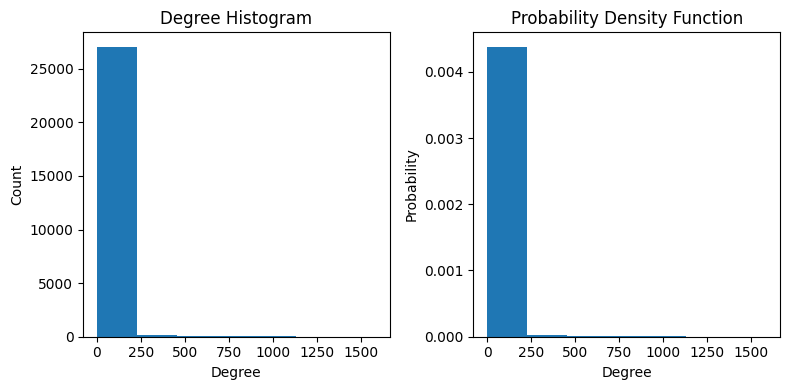

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in gsub.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.show()

In [ ]:
print(all_data)

(array([2.705e+04, 1.260e+02, 7.200e+01, 3.500e+01, 2.900e+01, 1.000e+01,
       5.000e+00]), array([   2.        ,  228.14285714,  454.28571429,  680.42857143,
        906.57142857, 1132.71428571, 1358.85714286, 1585.        ]), <a list of 7 Patch objects>)


In [ ]:
print(all_data[1])

[   2.          228.14285714  454.28571429  680.42857143  906.57142857
 1132.71428571 1358.85714286 1585.        ]


In [ ]:
bin_width = np.diff(all_data[1])
bin_width

array([226.14285714, 226.14285714, 226.14285714, 226.14285714,
       226.14285714, 226.14285714, 226.14285714])

In [ ]:
all_data[0].sum()


27327.0

In [ ]:
all_data[0]/(all_data[0].sum() * bin_width)


array([4.37716016e-03, 2.03889900e-05, 1.16508514e-05, 5.66360834e-06,
       4.69270405e-06, 1.61817381e-06, 8.09086906e-07])

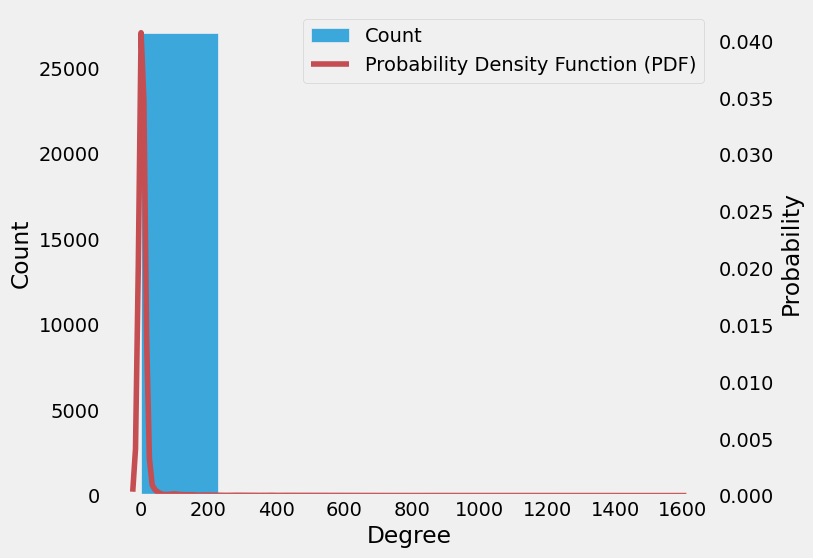

In [ ]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1,figsize=(7,6))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.show()

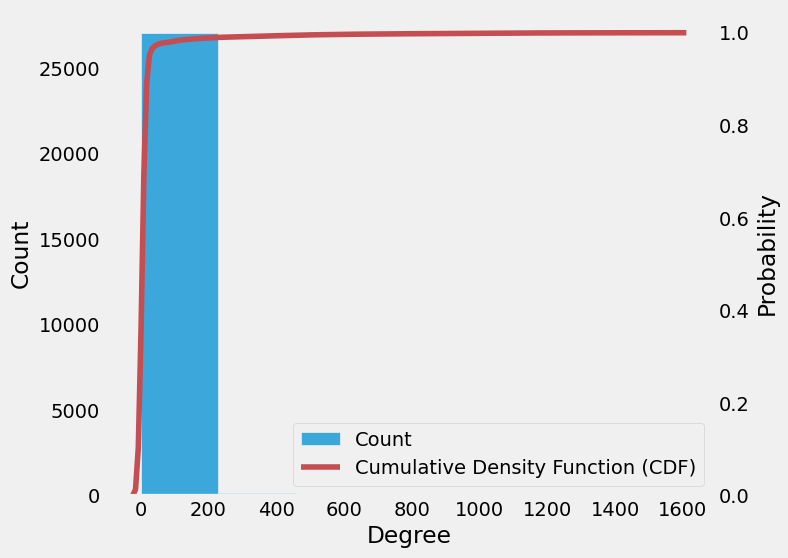

In [ ]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(7,6))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

##### Nodes with degree > 100

In [ ]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(gsub.degree()).items() if deg > 100]

# select a subgraph with 'core' nodes
gsub2 = nx.subgraph(gsub, core)

print("{} nodes, {} edges".format(len(gsub2), nx.number_of_edges(gsub2)))

493 nodes, 31632 edges


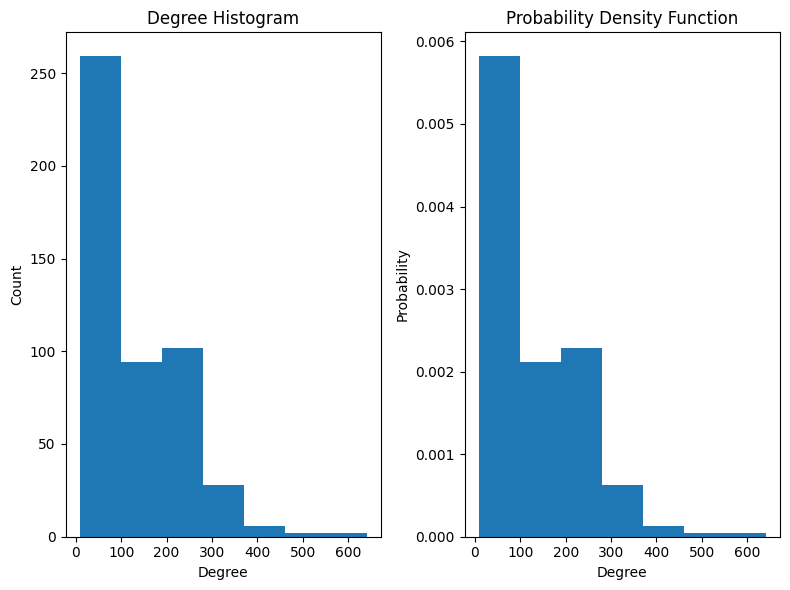

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in gsub2.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.show()

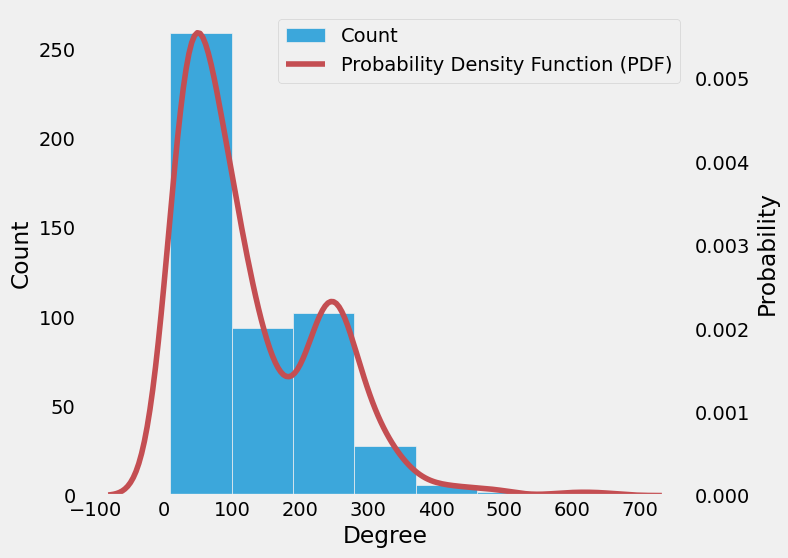

In [ ]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(7,6))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

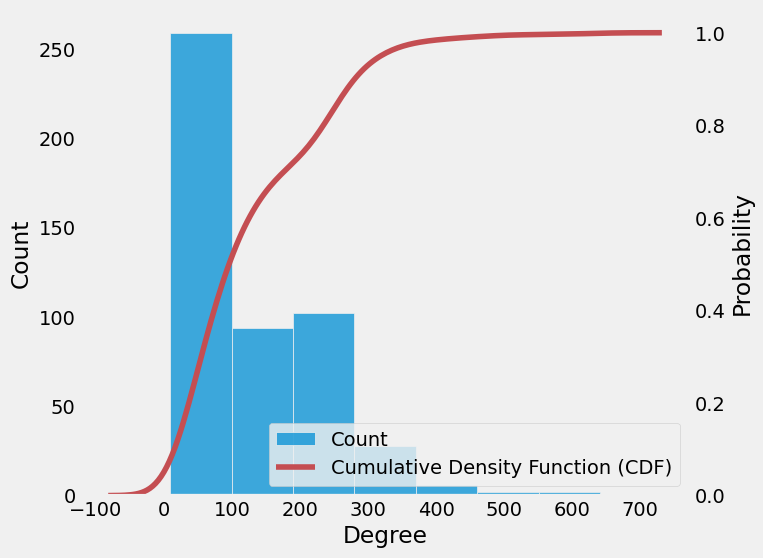

In [ ]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(7,6))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

#### Centrality distributions - Closeness

##### All nodes

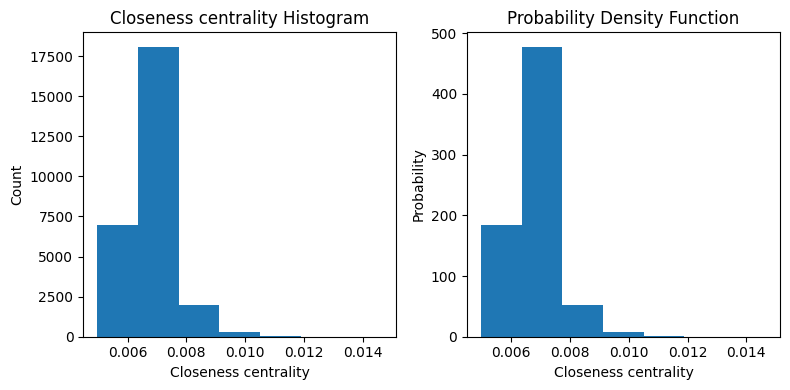

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([v for k, v in nx.closeness_centrality(gsub).items()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Closeness centrality Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Closeness centrality")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Closeness centrality")

plt.tight_layout()
plt.show()

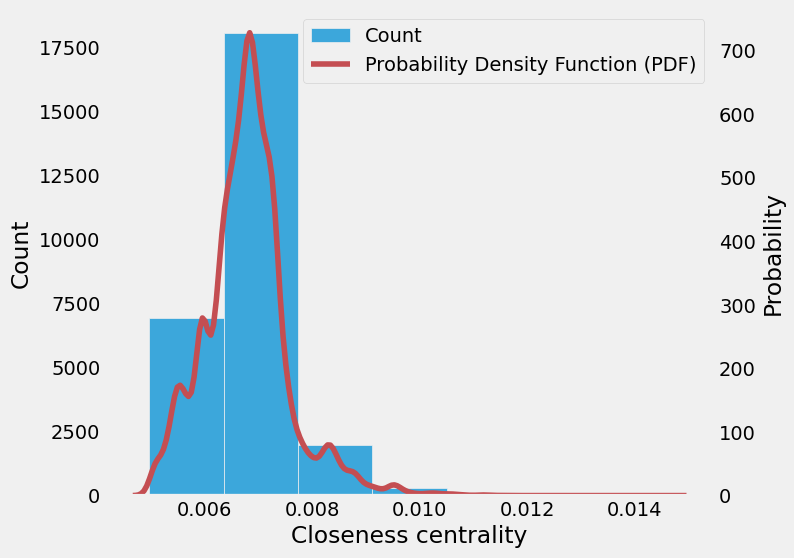

In [ ]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1,figsize=(7,6))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Closeness centrality")
ax2.set_ylabel("Probability")

plt.show()

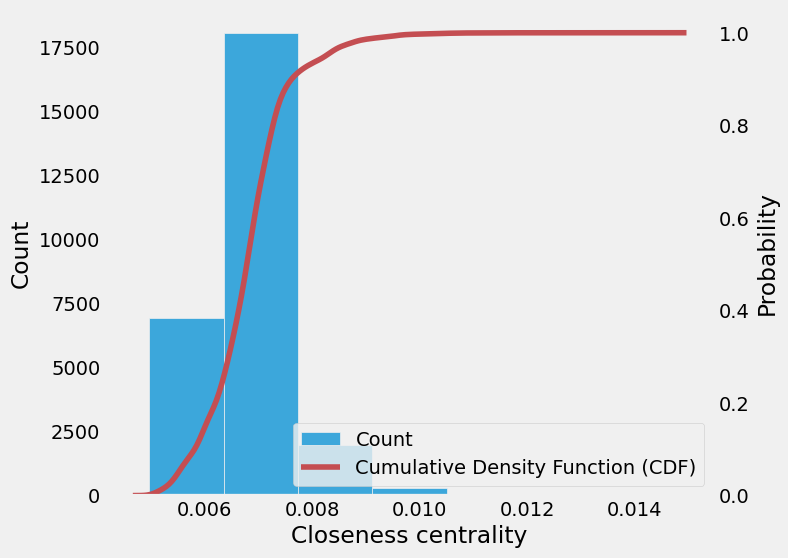

In [ ]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1,figsize=(7,6))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Closeness centrality")
ax2.set_ylabel("Probability")

plt.show()